# 双线性插值

In [1]:
import cv2 as cv
import numpy as np

In [2]:
# 双线性插值函数
def bilinear_interpolation(img_location, dst_h, dst_w):
    img_original = cv.imread(img_location)
    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    src_h, src_w, channel = img_original.shape
    print("src_h:",src_h,"src_w:",src_w,"channel:",channel)
    if src_h == dst_h and src_w == dst_w:
        return img_original.copy()
    img_dst = np.zeros((dst_h, dst_w, channel), dtype = np.uint8)
    for c in range(channel):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
                # 目标图坐标在原图中的坐标位置
                # 需要使用float进行强制类型转换，否则会报错
                src_x = (dst_x + 0.5) * (float(src_w) / dst_w) - 0.5
                src_y = (dst_y + 0.5) * (float(src_h) / dst_h) - 0.5
                
                # 求该坐标位置周围四个点的坐标
                src_x1 = int(np.floor(src_x))
                src_y1 = int(np.floor(src_y))
                src_x2 = min(src_x1 + 1, src_w - 1)
                src_y2 = min(src_y1 + 1, src_h - 1)
                
                # 运用双线性插值求值
                tmp1 = (src_x2 - src_x) * img_original[src_x1,src_y1,c] + (src_x - src_x1) * img_original[src_x2,src_y1,c]
                tmp2 = (src_x2 - src_x) * img_original[src_x1,src_y2,c] + (src_x - src_x1) * img_original[src_x2,src_y2,c]
                img_dst[dst_x,dst_y,c] = int((src_y2 - src_y) * tmp1 + (src_y - src_y1) * tmp2)

    return img_dst  
    

src_h: 512 src_w: 512 channel: 3


Text(0.5, 1.0, '双线性插值')

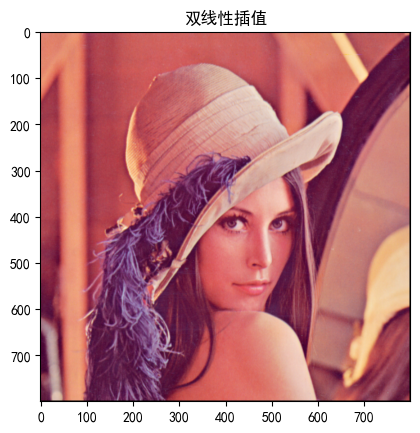

In [3]:
img_dst = bilinear_interpolation('lenna.png',800,800)
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
plt.imshow(img_dst)
plt.title('双线性插值')

# 直方图均衡化

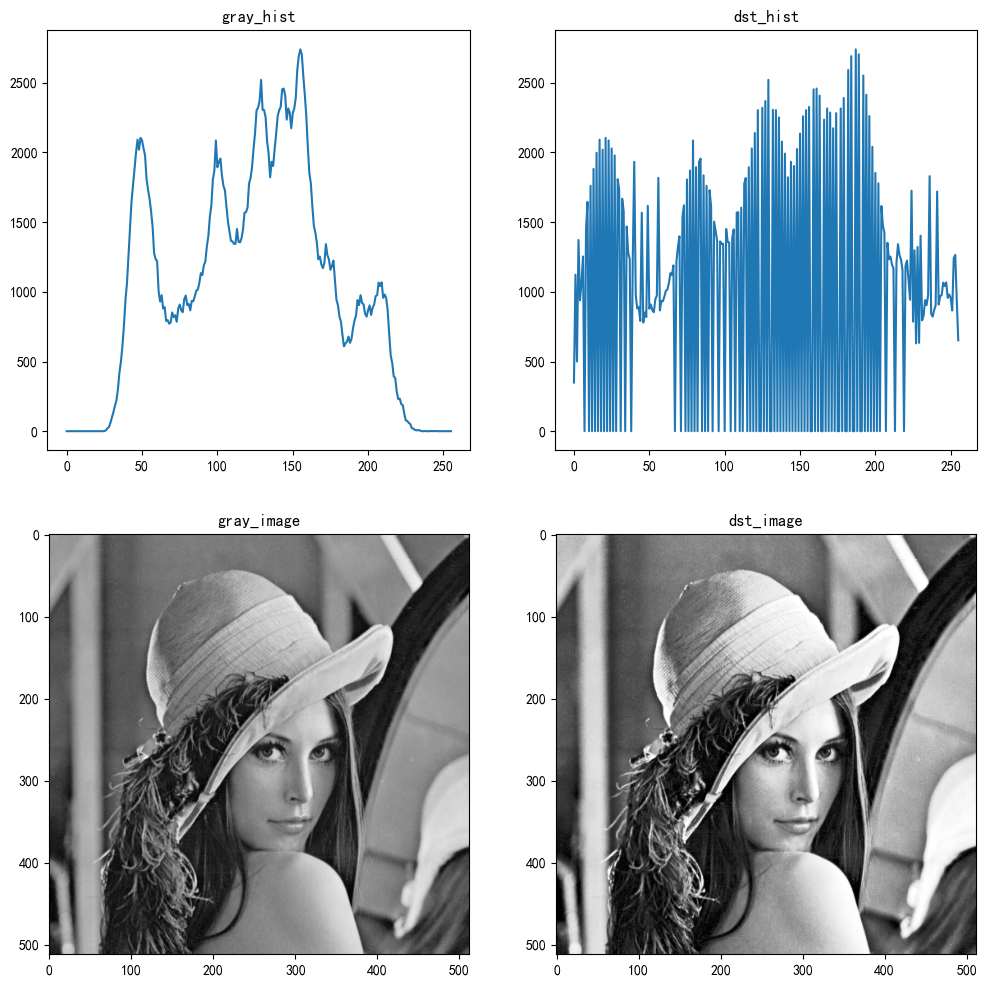

In [4]:
# 调用接口，读取图片转化为灰度图
img = cv.imread("lenna.png", 1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 直方图均衡化
dst = cv.equalizeHist(gray)

# 灰度图直方图和均衡化后的直方图
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])
dst_hist = cv.calcHist([dst], [0], None, [256], [0,256])

# 展示效果
plt.figure(figsize=(12,12),dpi=100)
plt.subplot(2,2,1)
plt.plot(gray_hist)
plt.title("gray_hist")

plt.subplot(2,2,2)
plt.plot(dst_hist)
plt.title("dst_hist")

plt.subplot(2,2,3)
plt.imshow(gray, cmap='gray')
plt.title("gray_image")

plt.subplot(2,2,4)
plt.imshow(dst, cmap='gray')
plt.title("dst_image")

plt.show()

Text(0.5, 1.0, '彩色均衡化')

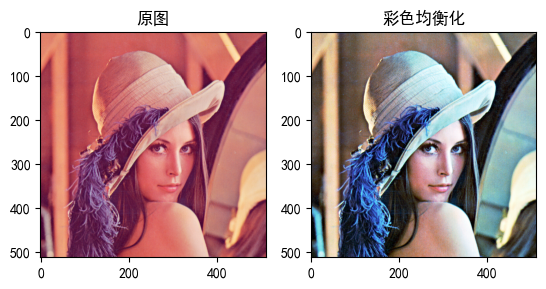

In [8]:
# 彩色图像直方图均衡化
img = cv.imread("lenna.png", 1)

# 彩色图像均衡化,对每一个通道均衡化
(b, g, r) = cv.split(img)
bH = cv.equalizeHist(b)
gH = cv.equalizeHist(g)
rH = cv.equalizeHist(r)
# 合并通道
result = cv.merge((bH, gH, rH))

# 效果展示
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("原图")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("彩色均衡化")

# Sobel边缘检测

In [12]:
# Sobel函数有一些注意事项，从给的代码中抄录

Text(0.5, 1.0, 'Result')

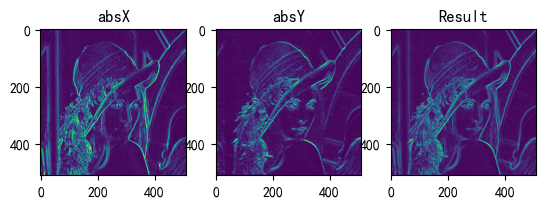

In [11]:
# 以灰度模式读取图像
img = cv.imread("lenna.png", 0)

'''
Sobel函数求完导数后会有负值，还有会大于255的值。
而原图像是uint8，即8位无符号数(范围在[0,255])，所以Sobel建立的图像位数不够，会有截断。
因此要使用16位有符号的数据类型，即cv2.CV_16S。
''' 
x = cv.Sobel(img, cv.CV_16S, 1, 0)
y = cv.Sobel(img, cv.CV_16S, 0, 1)

'''
在经过处理后，别忘了用convertScaleAbs()函数将其转回原来的uint8形式。
否则将无法显示图像，而只是一副灰色的窗口。
dst = cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])  
其中可选参数alpha是伸缩系数，beta是加到结果上的一个值。结果返回uint8类型的图片。
'''

absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)


'''
由于Sobel算子是在两个方向计算的，最后还需要用cv2.addWeighted(...)函数将其组合起来
。其函数原型为：
dst = cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])  
其中alpha是第一幅图片中元素的权重，beta是第二个的权重，
gamma是加到最后结果上的一个值。
'''
dst = cv.addWeighted(absX, 0.5, absY, 0.5, 0)
 
cv.imshow("absX", absX)
cv.imshow("absY", absY)
 
cv.imshow("Result", dst)
# 效果展示
plt.subplot(1,3,1)
plt.imshow(absX)
plt.title("absX")

plt.subplot(1,3,2)
plt.imshow(absY)
plt.title("absY")

plt.subplot(1,3,3)
plt.imshow(dst)
plt.title("Result")